In [1]:
import pandas as pd
import os
from PIL import Image

import numpy as np
from matplotlib import pyplot as plt


In [2]:
def show_some(features,flag):
    for x in range(0,5):
        single_fea=features[int(x*100)]
        img=Image.fromarray(single_fea)
        if flag==1:
           img.save(str(x)+'.jpg')
        if flag ==0:
           img.save(str(x)+'_raw.jpg')



def read_image(dir_list):
    #features=np.zeros((300,400))
    feature_list=[]

    for image_dir in dir_list:
        img=Image.open(image_dir)
        img=img.resize((224,224))
        im =np.asarray(img)
        #print(im.shape)
        #print(img.size)
        #new_img = Image.fromarray(im)
        #new_img.show()

        #features=np.stack(features,im)
        feature_list.append(im)
    raw_features=np.array(feature_list)
    #normalized_features=raw_features.astype('float32')/255.0
    return raw_features

In [3]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','valid'],loc='upper left')
    plt.show()


In [74]:
data_dir='Data_Collection/'

df = pd.read_excel('Attractiveness label.xlsx', sheet_name=None)

ndarray=df.values

label=ndarray[:,1]
label=np.reshape(label,(500,1))


In [20]:
image_flag=ndarray[:,0]
dir_list=[]

In [21]:
for flag in image_flag:
    #print(flag)
    flag_convert=str(int(flag))
    image_dir=data_dir+'SCUT-FBP-'+flag_convert+'.jpg'
    dir_list.append(image_dir)

In [22]:
dir_list

['Data_Collection/SCUT-FBP-1.jpg',
 'Data_Collection/SCUT-FBP-2.jpg',
 'Data_Collection/SCUT-FBP-3.jpg',
 'Data_Collection/SCUT-FBP-4.jpg',
 'Data_Collection/SCUT-FBP-5.jpg',
 'Data_Collection/SCUT-FBP-6.jpg',
 'Data_Collection/SCUT-FBP-7.jpg',
 'Data_Collection/SCUT-FBP-8.jpg',
 'Data_Collection/SCUT-FBP-9.jpg',
 'Data_Collection/SCUT-FBP-10.jpg',
 'Data_Collection/SCUT-FBP-11.jpg',
 'Data_Collection/SCUT-FBP-12.jpg',
 'Data_Collection/SCUT-FBP-13.jpg',
 'Data_Collection/SCUT-FBP-14.jpg',
 'Data_Collection/SCUT-FBP-15.jpg',
 'Data_Collection/SCUT-FBP-16.jpg',
 'Data_Collection/SCUT-FBP-17.jpg',
 'Data_Collection/SCUT-FBP-18.jpg',
 'Data_Collection/SCUT-FBP-19.jpg',
 'Data_Collection/SCUT-FBP-20.jpg',
 'Data_Collection/SCUT-FBP-21.jpg',
 'Data_Collection/SCUT-FBP-22.jpg',
 'Data_Collection/SCUT-FBP-23.jpg',
 'Data_Collection/SCUT-FBP-24.jpg',
 'Data_Collection/SCUT-FBP-25.jpg',
 'Data_Collection/SCUT-FBP-26.jpg',
 'Data_Collection/SCUT-FBP-27.jpg',
 'Data_Collection/SCUT-FBP-28.jpg',
 

In [23]:
normalized_features =read_image(dir_list)

/Users/DBRSJ/anaconda/envs/tf_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


In [25]:
normalized_features.shape

(500, 224, 224, 3)

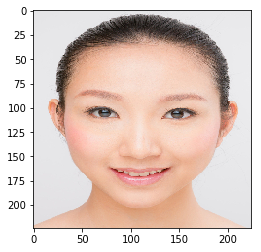

In [29]:
plt.imshow(normalized_features[50])
plt.show()

In [30]:

train_data=normalized_features[:400]
train_label=label[:400]

#Img=Image.fromarray(train_data[3].astype('uint8')*255)
#Img.save('WTF.png')
test_data=normalized_features[400:]
test_label=label[400:]

In [60]:
import keras
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten
from keras.optimizers import Adam
vgg=VGG16(weights='imagenet', pooling='max')

In [72]:
model = Sequential()
model.add(vgg)
model.add(Dense(1))
model.layers[0].trainable = False

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1000)              138357544 
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 138,358,545
Trainable params: 1,001
Non-trainable params: 138,357,544
_________________________________________________________________


In [63]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01),metrics=['mae'])
earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
# history=model.fit(batch_size=20, x=train_data, y=train_label, callbacks=[earlyStopping], validation_split=0.1,epochs=10,verbose=2)
model.fit(train_data, train_label, epochs=10)
# scores=model.evaluate(x=test_data,y=test_label)
#print (scores[1])
#show_train_history(history,'mae','val_mae')

Epoch 1/20
400/400 [==============================] - 254s 635ms/step - loss: 7.6211 - acc: 0.0000e+00
Epoch 2/20
400/400 [==============================] - 277s 692ms/step - loss: 6.3462 - acc: 0.0000e+00
Epoch 3/20
400/400 [==============================] - 387s 969ms/step - loss: 5.2335 - acc: 0.0000e+00
Epoch 4/20
400/400 [==============================] - 253s 633ms/step - loss: 4.2789 - acc: 0.0000e+00
Epoch 5/20
400/400 [==============================] - 258s 646ms/step - loss: 3.4774 - acc: 0.0000e+00
Epoch 6/20
400/400 [==============================] - 269s 673ms/step - loss: 2.8115 - acc: 0.0000e+00
Epoch 7/20
400/400 [==============================] - 394s 984ms/step - loss: 2.2736 - acc: 0.0000e+00
Epoch 8/20
400/400 [==============================] - 260s 650ms/step - loss: 1.8366 - acc: 0.0025
Epoch 9/20
400/400 [==============================] - 271s 677ms/step - loss: 1.4926 - acc: 0.0050
Epoch 10/20
400/400 [==============================] - 299s 748ms/step - loss: 1.

In [64]:
scores=model.evaluate(x=test_data,y=test_label)
print (scores[1])

100/100 [==============================] - 92s 920ms/step
0.0


In [65]:
scores

[0.30299292385578158, 0.0]

So 38% accuracy

In [66]:
prediction=model.predict(test_data)
prediction

array([[ 2.66360235],
       [ 2.62765932],
       [ 2.70976639],
       [ 2.66974974],
       [ 2.71991348],
       [ 2.58716202],
       [ 2.71973228],
       [ 2.62734222],
       [ 2.73221993],
       [ 2.7185111 ],
       [ 2.72213221],
       [ 2.50439191],
       [ 2.57234764],
       [ 2.54604745],
       [ 2.61338949],
       [ 2.7138381 ],
       [ 2.69026923],
       [ 2.44226456],
       [ 2.65604782],
       [ 2.68116164],
       [ 2.72760391],
       [ 2.73482037],
       [ 2.72967196],
       [ 2.73145008],
       [ 2.7209034 ],
       [ 2.70707035],
       [ 2.67623949],
       [ 2.72891283],
       [ 2.67418194],
       [ 2.58985186],
       [ 2.58394265],
       [ 2.59959936],
       [ 2.67788887],
       [ 2.55630469],
       [ 2.73172879],
       [ 2.68410158],
       [ 2.73674011],
       [ 2.67979288],
       [ 2.7319746 ],
       [ 2.65495634],
       [ 2.73213959],
       [ 2.61836624],
       [ 2.72970629],
       [ 2.70518351],
       [ 2.6827774 ],
       [ 2

In [67]:
test =read_image(['test/test.jpg','test/test1.jpg','test/test2.jpg','test/test4.jpg','test/test5.jpg'])
predict=model.predict(test)
print(predict)

[[ 2.56871963]
 [ 2.7222333 ]
 [ 2.65213752]
 [ 2.56958771]
 [ 2.61891103]]


In [56]:
model.save('model.h5')

Saved model to disk
